In [32]:
from qulacs import Observable, QuantumState, QuantumCircuit
from qulacsvis import circuit_drawer
import numpy as np
import matplotlib.pyplot as plt

In [33]:
n_qubits = 4
hamiltonian = Observable(n_qubits)
np.random.seed(1)
J_list = 2*np.random.rand(n_qubits)-1
for i in range(n_qubits):
    hamiltonian.add_operator(J_list[i], f"X {i} X {(i+1)%n_qubits}")
    hamiltonian.add_operator(J_list[i], f"Y {i} Y {(i+1)%n_qubits}")
    hamiltonian.add_operator(J_list[i], f"Z {i} Z {(i+1)%n_qubits}")

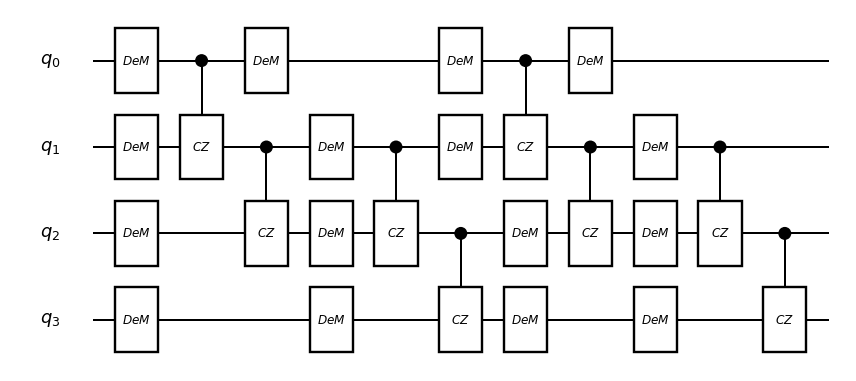

In [34]:
state = QuantumState(n_qubits)
circuit = QuantumCircuit(n_qubits)
depth = 2
for d in range(n_qubits):
    for i in range(n_qubits):
        circuit.add_U3_gate(i, *(2*np.pi*np.random.rand(3)))
    for i in range(n_qubits//2):
        circuit.add_CZ_gate((i+d%2), (i+1+d%2)%n_qubits)
circuit.update_quantum_state(state)
circuit_drawer(circuit, "mpl")

In [35]:
hamiltonian.get_expectation_value(state)

-0.08630460808005469

In [36]:
def sample_ZZ(_n_shots):
    global J_list, state
    samples = state.sampling(_n_shots)
    estimated_Z_energy = 0
    mask_list = [0b0011, 0b0110, 0b1100, 0b1001]
    for s in samples:
        for J, mask in zip(J_list, mask_list):
            bitcount = bin(s & mask).count("1")
            estimated_Z_energy += J*(-1)**bitcount/_n_shots
    return estimated_Z_energy

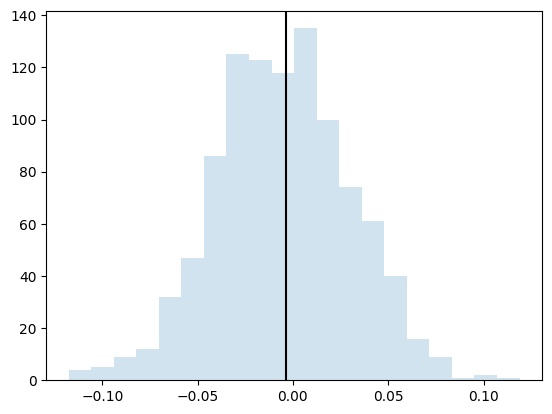

In [37]:
n_test = 1000
n_shots = 1000
result_list_ZZ = np.zeros(n_test)
for i in range(n_test):
    result_list_ZZ[i] = sample_ZZ(n_shots)
plt.hist(result_list_ZZ, alpha=0.2, bins=20)
hamiltonian_ZZ = Observable(n_qubits)
for i in range(n_qubits):
    hamiltonian_ZZ.add_operator(J_list[i], f"Z {i} Z {(i+1)%n_qubits}")
plt.axvline(hamiltonian_ZZ.get_expectation_value(state), color="black")
plt.show()

In [38]:
# I'm not sure if it's correct answer.
def sample_XX(_n_shots):
    global J_list, state, n_qubits
    for i in range(n_qubits):
        H(i).update_quantum_state(state)
    samples = state.sampling(_n_shots)
    estimated_X_energy = 0
    mask_list = [0b0011, 0b0110, 0b1100, 0b1001]
    for s in samples:
        for J, mask in zip(J_list, mask_list):
            bitcount = bin(s & mask).count("1")
            estimated_X_energy += J*(-1)**bitcount/_n_shots
    return estimated_X_energy

In [39]:
n_test = 1000
n_shots = 1000
result_list_XX = np.zeros(n_test)
for i in range(n_test):
    result_list_XX[i] = sample_XX(n_shots)
plt.hist(result_list_XX, alpha=0.2, bins=20)
hamiltonian_XX = Observable(n_qubits)
for i in range(n_qubits):
    hamiltonian_XX.add_operator(J_list[i], f"X {i} X {(i+1)%n_qubits}")
plt.axvline(hamiltonian_XX.get_expectation_value(state), color="black")
plt.show()

NameError: name 'H' is not defined